In [107]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
# load the breast cancer dataset and train and test split
X, y = load_breast_cancer(return_X_y=True)

<Axes: ylabel='count'>

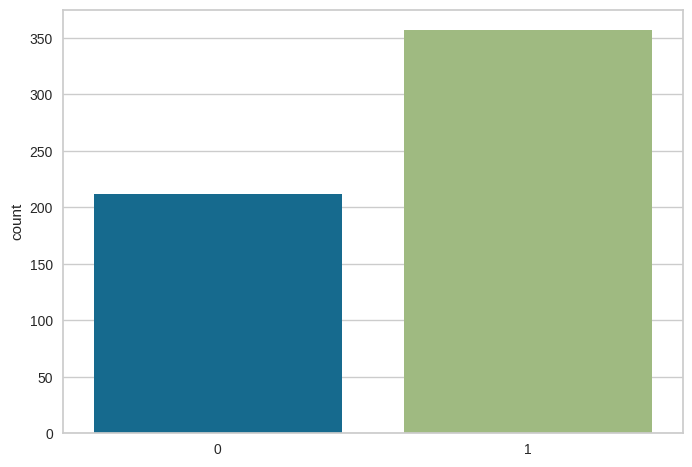

In [109]:
plt.figure()
sns.countplot(x=y)

Расстояние Кука - это мера того, насколько изменились бы остатки для всех записей, если конкретная запись не участвовала бы в вычислении коэффициентов модели. Большое расстояние Кука говорит о том, что исключение записи существенно изменяет коэффициенты, и должна рассматриваться как влияющая.

Влияющие записи должны быть тщательно исследованы, чтобы определить, нужно ли назначить им меньший вес при оценивании модели или урезать резко выделяющиеся значения (выбросы) до некоторого приемлемого порогового значения, или же полностью удалить влияющие записи.

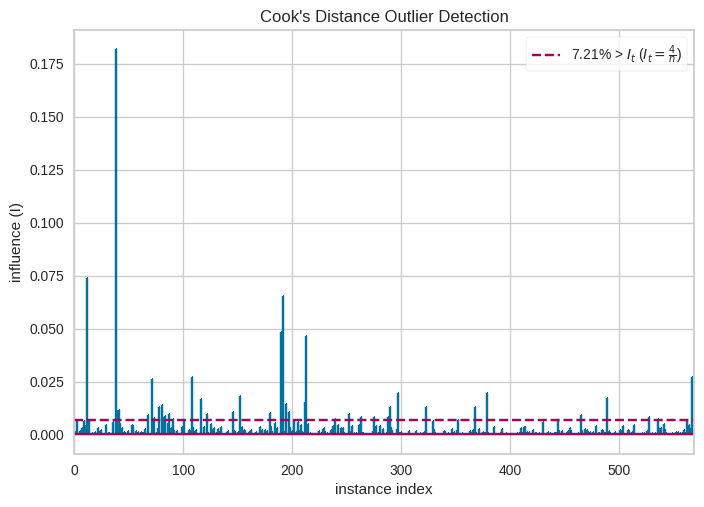

<Axes: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [110]:
from yellowbrick.regressor import CooksDistance
visualizer_cook_distance = CooksDistance()
visualizer_cook_distance.fit(X, y)
visualizer_cook_distance.show()

убираем из модели выбросы, хотя их нужно по хорошему более тонко настраивать

In [111]:
X = X[visualizer_cook_distance.distance_ <= visualizer_cook_distance.influence_threshold_]
y = y[visualizer_cook_distance.distance_ <= visualizer_cook_distance.influence_threshold_]

In [112]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.20, random_state =23)
# Standardization
sc = StandardScaler (); sc.fit(X)
X_std = sc.transform(X); X_train_std = sc.transform(X_train ); X_test_std = sc.transform(X_test)

In [113]:
# Binomial Logistic regression. Fit the model
clf = LogisticRegression(penalty="l2", C=1, max_iter=5000)

Определяем наиболее оптимальный порог для логистической регрессии. Оптимальный порог (точка, где пересекаются кривые точности, полноты, и F1-меры)

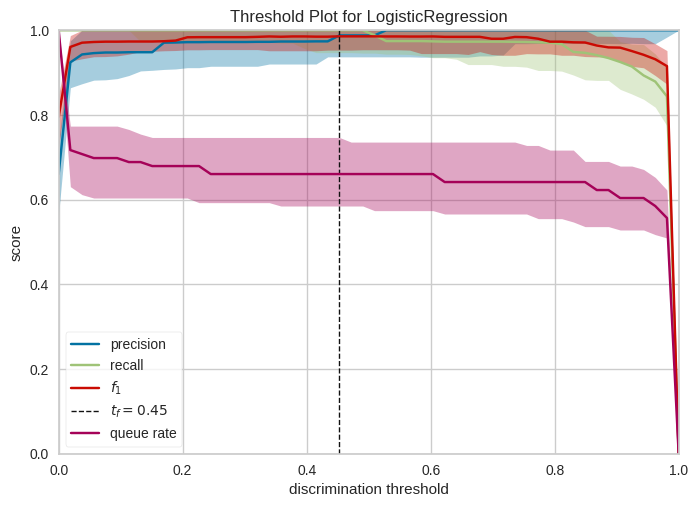

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [114]:
from yellowbrick.classifier import DiscriminationThreshold
visualizer_threshold = DiscriminationThreshold(clf)
visualizer_threshold.fit(X, y)        # Fit the data to the visualizer
visualizer_threshold.show()           # Finalize and render the figure

In [115]:
clf.fit(X_train_std , y_train)
# Prediction
y_pred_proba = clf.predict_proba(X_test_std)[:, 1]
threshold = 0.45
y_pred = (y_pred_proba >= threshold).astype(int)

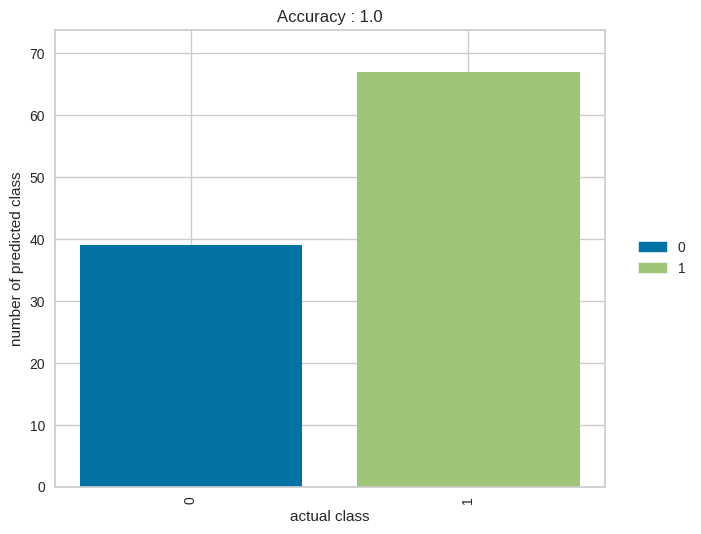

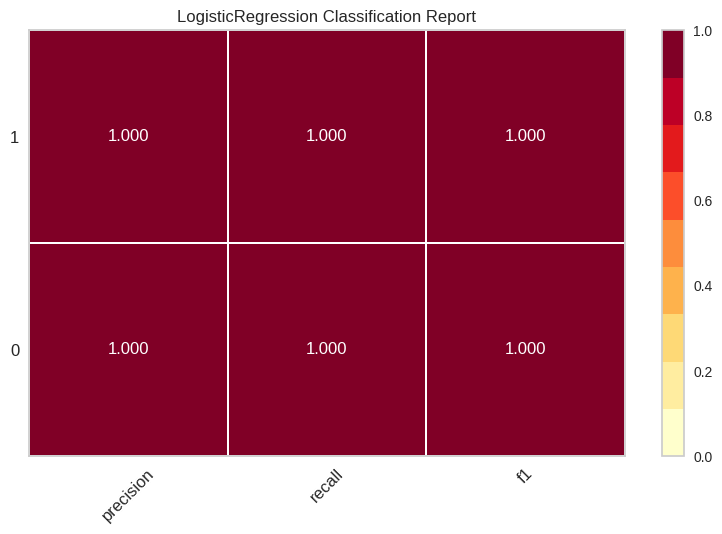

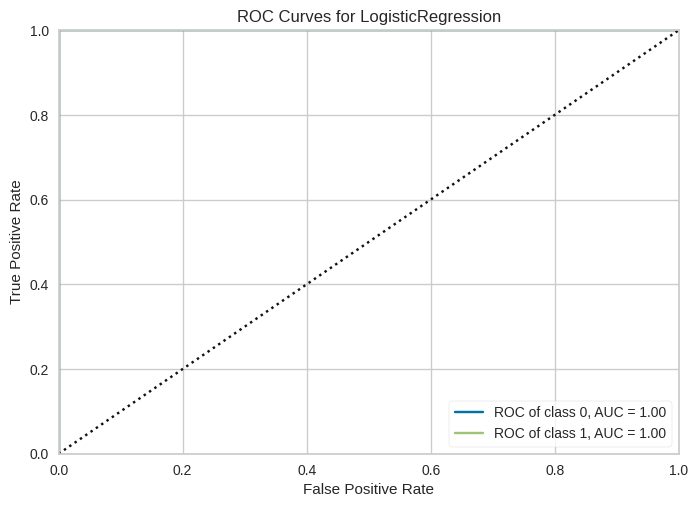

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [116]:
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

visualizer_class_error = ClassPredictionError(clf)#рисуем гистограмму ошибок для каждого класса
visualizer_class_error.fit(X_train_std, y_train)
visualizer_class_error.score(X_test_std , y_test)
visualizer_class_error.title = f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}"
visualizer_class_error.show()

visualizer_report = ClassificationReport(clf)#рисуем таблицу со всеми оценками классификации
visualizer_report.fit(X_train_std, y_train)
visualizer_report.score(X_test_std , y_test)
visualizer_report.show()

visualizer_roc = ROCAUC(clf, micro=False , macro=False)#рисуем ROC кривую
visualizer_roc.fit(X_train_std , y_train)
visualizer_roc.score(X_test_std , y_test)
visualizer_roc.show()

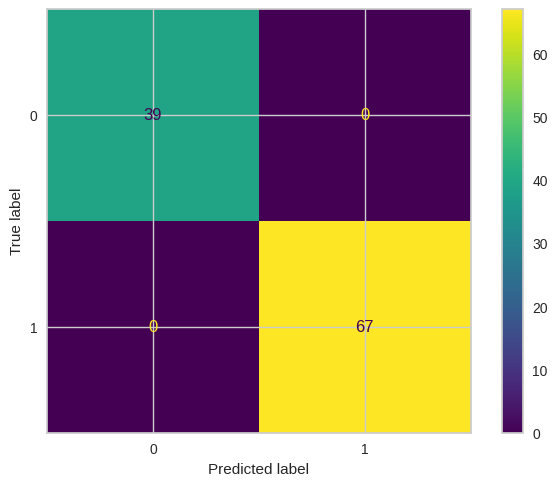

In [117]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.show()

без выбросов наша модель идеально предсказала значения